# 5. 파이썬을 이용한 과학 계산

## 5.1 개요와 사전준비

### 5.1.1 개요

### 5.1.2 라이브러리 임포트

In [96]:
import numpy as np
import numpy.random as random
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%precision 3

'%.3f'

## 5.2 넘파이를 이용한 계산 방법

### 5.2.1 인덱스 참조

데이터 참조

In [97]:
sample_array = np.arange(10)
print('sample_array', sample_array)

sample_array [0 1 2 3 4 5 6 7 8 9]


In [98]:
print(sample_array)
sample_array_slice = sample_array[0:5]
print(sample_array_slice)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [99]:
sample_array_slice[0:3] = 10
print(sample_array_slice)
print(sample_array)

# 슬라이싱은 원본 리스트의 원소 값도 변경한다는 점에 주의
# 원래 변수 값도 바뀌는 이유는 복사가 아니라 참조하기 때문

[10 10 10  3  4]
[10 10 10  3  4  5  6  7  8  9]


데이터 복사

In [100]:
sample_array_copy = np.copy(sample_array)
print(sample_array_copy)

sample_array_copy[0:3] = 20
print(sample_array_copy)

print(sample_array)
# copy해서 다른 object를 생성하면 원본 리스트의 원소는 변경되지 않음

[10 10 10  3  4  5  6  7  8  9]
[20 20 20  3  4  5  6  7  8  9]
[10 10 10  3  4  5  6  7  8  9]


불(boolean) 인덱스 참조

In [101]:
sample_names = np.array(['a', 'b', 'c', 'd', 'a'])
random.seed(0)
data = random.randn(5, 5)

print(sample_names)
print(data)

['a' 'b' 'c' 'd' 'a']
[[ 1.764  0.4    0.979  2.241  1.868]
 [-0.977  0.95  -0.151 -0.103  0.411]
 [ 0.144  1.454  0.761  0.122  0.444]
 [ 0.334  1.494 -0.205  0.313 -0.854]
 [-2.553  0.654  0.864 -0.742  2.27 ]]


In [102]:
sample_names == 'a'

array([ True, False, False, False,  True])

In [103]:
data[sample_names == 'a']
# 2차원 배열이므로 0번째와 네 번째 열이 추출

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

조건 제어

* numpy.where(조건 배열, X 데이터, Y 데이터)

In [104]:
cond_data = np.array([True, True, False, False, True])
x_array = np.array([1, 2, 3, 4, 5])
y_array = np.array([100, 200, 300, 400, 500])
print(np.where(cond_data, x_array, y_array))

[  1   2 300 400   5]


연습문제

In [105]:
# 5-1

In [106]:
# 5-2

In [107]:
# 5-3

### 5.2.2 넘파이를 이용한 연산 작업

중복 삭제

In [108]:
cond_data = np.array([True, True, False, False, True])

print(cond_data)
print(np.unique(cond_data))
print(cond_data) # inplace 안됨

[ True  True False False  True]
[False  True]
[ True  True False False  True]


범용 함수

: 모든 원소에 함수를 적용할 수 있는 기능



In [109]:
sample_data = np.arange(10)
print('원본 데이터 \t\t:', sample_data)
print('모든 원소의 제곱근 \t\t:', np.sqrt(sample_data))
print('모든 원소의 자연상수 지수함수 \t:', np.exp(sample_data))

원본 데이터 		: [0 1 2 3 4 5 6 7 8 9]
모든 원소의 제곱근 		: [0.    1.    1.414 1.732 2.    2.236 2.449 2.646 2.828 3.   ]
모든 원소의 자연상수 지수함수 	: [1.000e+00 2.718e+00 7.389e+00 2.009e+01 5.460e+01 1.484e+02 4.034e+02
 1.097e+03 2.981e+03 8.103e+03]


최소, 최대, 평균, 합계 계산

In [110]:
sample_multi_array_data1 = np.arange(9).reshape(3, 3)
print(sample_multi_array_data1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [111]:
print('최소값\t:', sample_multi_array_data1.min())
print('최대값\t:', sample_multi_array_data1.max())
print('평균\t:', sample_multi_array_data1.mean())
print('합계\t:', sample_multi_array_data1.sum())

print('행 합계\t:', sample_multi_array_data1.sum(axis = 1))
print('열 합계\t:', sample_multi_array_data1.sum(axis = 0))

최소값	: 0
최대값	: 8
평균	: 4.0
합계	: 36
행 합계	: [ 3 12 21]
열 합계	: [ 9 12 15]


진릿값 판정

In [112]:
cond_data = np.array([ True,  True, False, False,  True])

print('True가 하나라도 있는가\t:', cond_data.any())
print('모두 True인가\t\t:', cond_data.all())

True가 하나라도 있는가	: True
모두 True인가		: False


In [113]:
sample_multi_array_data1 = np.arange(9).reshape(3, 3)
print(sample_multi_array_data1)
print('5보다 큰 숫자가 몇 개인가:', (sample_multi_array_data1 > 5).sum())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
5보다 큰 숫자가 몇 개인가: 3


대각성분 계산

In [114]:
sample_multi_array_data1 = np.arange(9).reshape(3, 3)
print(sample_multi_array_data1)

print('대각성분\t\t:', np.diag(sample_multi_array_data1))
print('대각성분의 합\t:', np.trace(sample_multi_array_data1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
대각성분		: [0 4 8]
대각성분의 합	: 12


연습문제

In [115]:
# 5-4

In [116]:
# 5-5

In [117]:
# 5-6

### 5.2.3 배열의 조작과 브로드캐스트

재배열(reshape)

In [118]:
sample_array = np.arange(10)
sample_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
sample_array2 = sample_array.reshape(2, 5)
sample_array2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [120]:
sample_array2.reshape(5, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

데이터 결합 - 수직 방향 결합

In [121]:
sample_array3 = np.array([[1, 2, 3], [4, 5, 6]])
sample_array4 = np.array([[7, 8, 9], [10, 11, 12]])
print(sample_array3)
print(sample_array4)

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]


In [122]:
np.concatenate([sample_array3, sample_array4], axis = 0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [123]:
np.vstack([sample_array3, sample_array4])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

데이터 결합 - 수평 방향 결합

In [124]:
np.concatenate([sample_array3, sample_array4], axis = 1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [125]:
np.hstack([sample_array3, sample_array4])

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

배열 분할

In [126]:
sample_array3 = np.array([[1, 2, 3], [4, 5, 6]])
sample_array4 = np.array([[7, 8, 9], [10, 11, 12]])
sample_array_vstack = np.vstack([sample_array3, sample_array4])
sample_array_vstack

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [127]:
first, second, third = np.split(sample_array_vstack, [1, 3])
# ~1 / 1~3 / 3~ 으로 분할 >>> 0 / 1, 2 / 3

print("first\n", first)
print("second\n", second)
print("second[0]\n", second[0])
print("third\n", third)

first
 [[1 2 3]]
second
 [[4 5 6]
 [7 8 9]]
second[0]
 [4 5 6]
third
 [[10 11 12]]


In [128]:
sample_array5 = np.array(np.arange(13, 22)).reshape(3, 3)
sample_array_vstack2 = np.vstack([sample_array3, sample_array4, sample_array5])
sample_array_vstack2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21]])

In [129]:
first, second, third, forth = np.split(sample_array_vstack2, [2, 3, 5])
# ~2, 2~3, 3~5, 5 으로 분할 >>> 0, 1 / 2 / 3, 4 / 5

print("first\n", first)
print("first[0]\n", first[0])
print("first[1]\n", first[1])
print("second\n", second)
print("third\n", third)
print("forth\n", forth)

first
 [[1 2 3]
 [4 5 6]]
first[0]
 [1 2 3]
first[1]
 [4 5 6]
second
 [[7 8 9]]
third
 [[10 11 12]
 [13 14 15]]
forth
 [[16 17 18]
 [19 20 21]]


반복 작업

In [130]:
print(first)
print(first.repeat(5))

[[1 2 3]
 [4 5 6]]
[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6]


브로드캐스트

In [131]:
sample_array = np.arange(10)
print(sample_array)

[0 1 2 3 4 5 6 7 8 9]


In [132]:
sample_array+3

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

연습문제

In [133]:
# 5-7

In [134]:
# 5-8

In [135]:
# 5-9

## 5.3 사이파이 응용

### 5.3.1 보간법

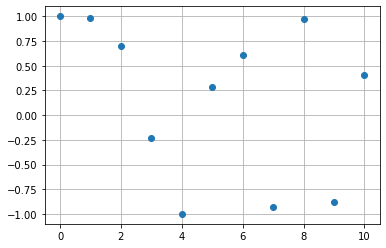

In [136]:
x = np.linspace(0, 10, num = 11, endpoint = True)
y = np.cos(-x**2/5.0)
plt.plot(x, y, 'o')
plt.grid(True)

선형 보간법

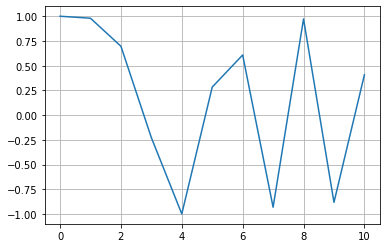

In [137]:
from scipy import interpolate

f = interpolate.interp1d(x, y, 'linear')
plt.plot(x, f(x), '-')
plt.grid(True)

스플라인 3차 보간법

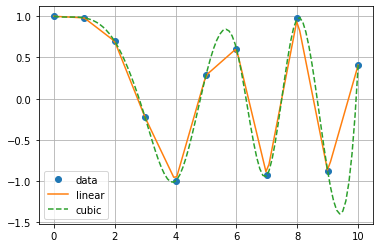

In [138]:
f2 = interpolate.interp1d(x, y , 'cubic')
xnew = np.linspace(0, 10, num = 100, endpoint = True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc = 'best')
plt.grid(True)

연습문제

In [139]:
# 5-10

In [140]:
# 5-11

In [141]:
# 5-12

### 5.3.2 선형대수: 행렬 분해

특잇값 분해

In [142]:
A = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s, m, n)
print('U.S.V* = \n', U@S@Vs)
print("U\n", U)
print("S\n", S)
print("Vs\n", Vs)

U.S.V* = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]
U
 [[-0.37  -0.929]
 [-0.929  0.37 ]]
S
 [[19.538  0.     0.     0.     0.   ]
 [ 0.     1.81   0.     0.     0.   ]]
Vs
 [[-0.304 -0.371 -0.437 -0.504 -0.57 ]
 [ 0.712  0.403  0.094 -0.215 -0.524]
 [-0.374 -0.008  0.862 -0.206 -0.274]
 [-0.365  0.371 -0.159  0.665 -0.512]
 [-0.357  0.75  -0.179 -0.464  0.251]]


LU 분해

In [143]:
A = np.identity(5)
A[0, :] = 1
A[:, 0] = 1
A[0, 0] = 5
b = np.ones(5)

(LU, piv) = sp.linalg.lu_factor(A)
L = np.identity(5) + np.tril(LU, -1)
U = np.triu(LU)
P = np.identity(5)[piv]

x = sp.linalg.lu_solve((LU, piv), b)
x


array([-3.,  4.,  4.,  4.,  4.])

숄레스키 분해

In [144]:
A = np.array([[7, -1, 0, 1],
             [-1, 9, -2, 2],
             [0, -2, 8, -3],
             [1, 2, -3, 10]])
b = np.array([5, 20, 0, 20])
L = sp.linalg.cholesky(A)

t = sp.linalg.solve(L.T.conj(), b)
x = sp.linalg.solve(L, t)

print(x)

[0.758 2.168 1.241 1.863]


In [145]:
np.dot(A, x)

array([5.000e+00, 2.000e+01, 3.553e-15, 2.000e+01])

음수미포함행렬분해 Non-negative Matrix Factorization(NMF)

In [146]:
from sklearn.decomposition import NMF

X = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]])
model = NMF(n_components = 2, init = 'random', random_state = 0)

W = model.fit_transform(X)
H = model.components_
W

array([[0.425, 0.222],
       [0.698, 0.537],
       [0.039, 1.434],
       [2.377, 0.463]])

In [147]:
H

array([[1.281, 1.281, 1.282],
       [2.058, 2.058, 2.058]])

In [148]:
np.dot(W, H)

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

In [149]:
W@H

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

연습문제

In [150]:
# 5-13

### 5.3.3 적분과 미분방적식

적분

In [151]:
from scipy import integrate
import math

In [152]:
def calcPi(x):
    return 4/(1+x**2)

In [153]:
integrate.quad(calcPi, 0, 1)

(3.142, 0.000)

In [154]:
integrate.quad(lambda x: 4/(1+x**2), 0, 1)

(3.142, 0.000)

In [155]:
# Questions 식이 주어지지 않고 점들만 주어진다면 그 아래 면적 적분을 어떻게 해야할까

sin 함수를 구하는 예

In [156]:
from numpy import sin
integrate.quad(sin, 0, math.pi/1)

(2.000, 0.000)

In [157]:
def I(n):
    return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)
print('n=1일 때', I(1))
print('n=2일 때', I(2))
print('n=3일 때', I(3))
print('n=4일 때', I(4))

n=1일 때 (1.0000000000048965, 6.360750360104306e-08)
n=2일 때 (0.4999999999985751, 1.3894083651858995e-08)
n=3일 때 (0.33333333325010883, 1.3888461883425516e-08)
n=4일 때 (0.2500000000043577, 1.2983033469368098e-08)


미분방적식 계산

In [158]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz_func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

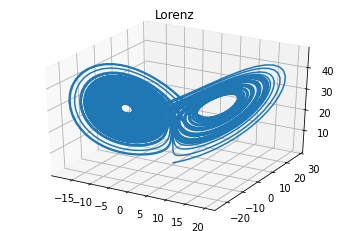

In [159]:
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

v = odeint(lorenz_func, v0, t, args = (p, r, b))

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])
plt.title('Lorenz')
plt.grid(True)

연습문제

In [160]:
# 5-15

In [161]:
# 5-16

### 5.2.4 최적화

In [162]:
from scipy.optimize import fsolve

2차원 함수의 최적화

In [163]:
def f(x):
    y = 2*x**2 + 2*x + -10
    return y

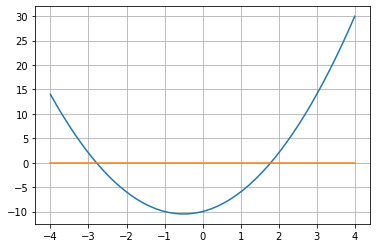

In [164]:
x = np.linspace(-4, 4)
plt.plot(x, f(x))
plt.plot(x, np.zeros(len(x)))
plt.grid(True)

In [165]:
x = fsolve(f, 2)
print(x)

[1.791]


In [166]:
x = fsolve(f, -3)
print(x)

[-2.791]


최적화 문제 풀기

In [167]:
from scipy.optimize import minimize

In [168]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

In [169]:
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

x0 = [1, 5, 5, 1]
print(objective(x0))


16


In [170]:
b = (1.0, 5.0)
bnds = (b, b, b, b)
con1 = {'type':'ineq', 'fun':constraint1}
con2 = {'type':'ineq', 'fun':constraint2}
cons = [con1, con2]

In [171]:
sol = minimize(objective, x0, method = 'SLSQP', bounds = bnds, constraints = cons)
print(sol)

     fun: 17.014017245446883
     jac: array([14.572,  1.379,  2.379,  9.564])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.   , 4.743, 3.821, 1.379])


In [172]:
print('Y:', sol.fun)
print('X:', sol.x)

Y: 17.014017245446883
X: [1.    4.743 3.821 1.379]


연습문제

In [173]:
# 5-17

## 종합문제

In [174]:
# 5-1

In [175]:
# 5-2

In [176]:
# 5-3